Първото, с което ще започнем, е преработване на размера на снимките. Това е изискване на компанията, за която разработваме решението. Желаният им размер е 400 х 300 (широчина х височина). Реализацията е изключително лесна:

In [ ]:
import os
from PIL import Image

def img_resize(path, width, height):
	
	image = Image.open(path)
		
	image = image.resize((width, height))
	
	image.save(path)
	
	image.close()

def dir_img_resize(dir, width, height):

	files_names_list = os.listdir(dir)

	for file_name in files_names_list:
	
		path = dir + file_name
		
		img_resize(path, width, height)

		print(path) # debug

		
dir_img_resize("../data/clean/", 400, 300)

dir_img_resize("../data/dirty/", 400, 300)

dir_img_resize("../data/borderline/", 400, 300)

В снимките, с които разполагаме, има много цветове, което е неудобно за нас. Нашата задача налага фокус само и единствено върху дъното на щайгата в снимката, не ни интересува пространството около щайгата. В идеална среда, снимката ще обхваща само щайгата и нищо друго, но в случая, трябва да намерим начин да изолираме дъното от останалата час от снимката. Ето как изглежда една снимка:

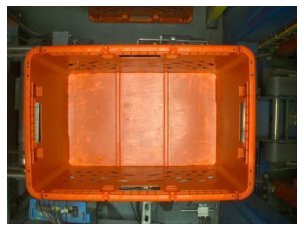

In [9]:
import os
import matplotlib.image
import matplotlib.pyplot

clean_container = matplotlib.image.imread("../data/clean/" + os.listdir("../data/clean/")[0])

matplotlib.pyplot.imshow(clean_container)

matplotlib.pyplot.axis("off")

matplotlib.pyplot.show()

Забелязва се, че изолирането на дъното може да се реализира чрез анализ на цветовете на пикселите в снимката. Поради удобства, които ще станат очевидни след малко, ще използваме hsv(hue, saturation, value) формат вместо да разглеждаме rgb. 

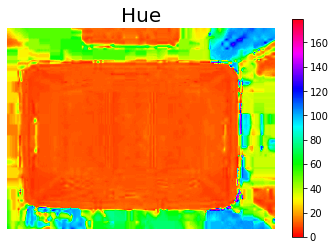

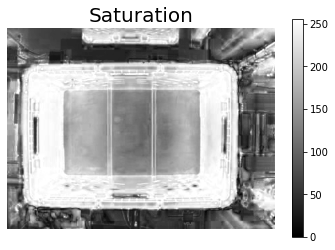

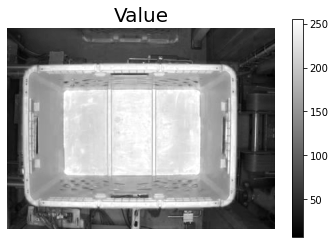

In [13]:
import os
import matplotlib.pyplot
import cv2
import numpy

def image_hsv_plot(image_path):

    clean_container = cv2.imread(image_path)

    clean_container_hsv = cv2.cvtColor(clean_container, cv2.COLOR_BGR2HSV) # BGR is RGB

    # display the channels

    # hue channel

    hue_image = matplotlib.pyplot.imshow(clean_container_hsv[:, :, 0], "hsv") # let's keep adding new syntax

    matplotlib.pyplot.title("Hue", fontsize = 20)

    matplotlib.pyplot.axis("off")

    matplotlib.pyplot.colorbar(hue_image)
    
    matplotlib.pyplot.show()

    # saturation channel

    saturation_image = matplotlib.pyplot.imshow(clean_container_hsv[:, :, 1], "gray")

    matplotlib.pyplot.title("Saturation", fontsize = 20)

    matplotlib.pyplot.axis("off")

    matplotlib.pyplot.colorbar(saturation_image)
    
    matplotlib.pyplot.show()

    # value channel

    value_image = matplotlib.pyplot.imshow(clean_container_hsv[:, :, 2], "gray")

    matplotlib.pyplot.title("Value", fontsize = 20)

    matplotlib.pyplot.axis("off")

    matplotlib.pyplot.colorbar(value_image)
    
    matplotlib.pyplot.show()

image_hsv_plot("../data/clean/" + os.listdir("../data/clean/")[0])

Предимството, което hsv форматът ни предоставя, е възможността да извлечем наситеността на светлината във снимката. Точно над зоната, в която може да има замърсявания, е поставена лампа, и тя свети най - ярко там. Това може да се забележи в снимките горе. Сега освен по цвят, може да изолираме обекти и по това колко са осветени. На база данните, които имаме, можем да съставим маска, чрез която ще направим изолацията:

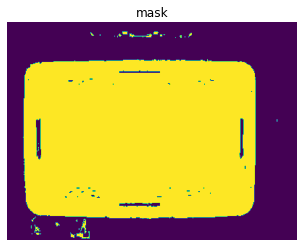

In [1]:
import os
import matplotlib.pyplot
import cv2
import numpy

files_names = os.listdir("../data/clean/")

files_count = len(files_names)

clean_container = cv2.imread("../data/clean/" + files_names[0])

clean_container_hsv = cv2.cvtColor(clean_container, cv2.COLOR_BGR2HSV)

hue = (clean_container_hsv[:, :, 0] < 100) * (clean_container_hsv[:, :, 0] > 3)

saturation = (clean_container_hsv[:, :, 1] > 70)

value = (clean_container_hsv[:, :, 2] > 120)

mask = saturation * value * hue

matplotlib.pyplot.title("mask")

matplotlib.pyplot.imshow(mask)

matplotlib.pyplot.axis("off")

matplotlib.pyplot.show()

След много опити се установи, че тези стойности най - безопасно изолират контейнера в голямо количество от снимките. Поради цветовете на самата щайга и отражението на светлината от нея, не можем да безопасно изолираме само дъното и. Остава само да приложим маската върху оригиналната снимка и да видим резултата:

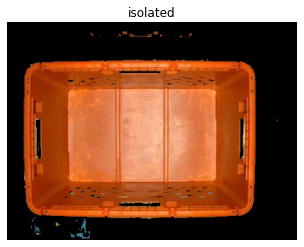

In [1]:
import os
import matplotlib.pyplot
import cv2
import numpy

files_names = os.listdir("../data/clean/")

files_count = len(files_names)

clean_container = cv2.imread("../data/clean/" + files_names[0])

clean_container_hsv = cv2.cvtColor(clean_container, cv2.COLOR_BGR2HSV)

hue = (clean_container_hsv[:, :, 0] < 100) * (clean_container_hsv[:, :, 0] > 3)

saturation = (clean_container_hsv[:, :, 1] > 70)

value = (clean_container_hsv[:, :, 2] > 120)

mask = saturation * value * hue

clean_container_hsv[:, :, 0] *= mask

clean_container_hsv[:, :, 1] *= mask

clean_container_hsv[:, :, 2] *= mask

clean_container = cv2.cvtColor(clean_container_hsv, cv2.COLOR_HSV2RGB)

matplotlib.pyplot.title("isolated")

matplotlib.pyplot.imshow(clean_container)

matplotlib.pyplot.axis("off")

matplotlib.pyplot.show()